In [1]:
import cv2.cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

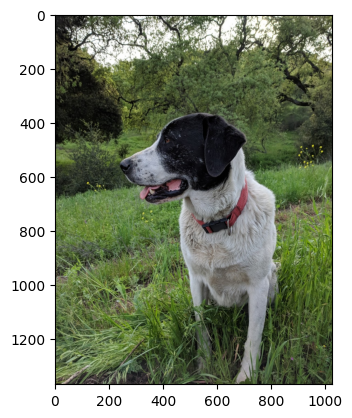

In [2]:
full = cv2.imread('../computer_vision/DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

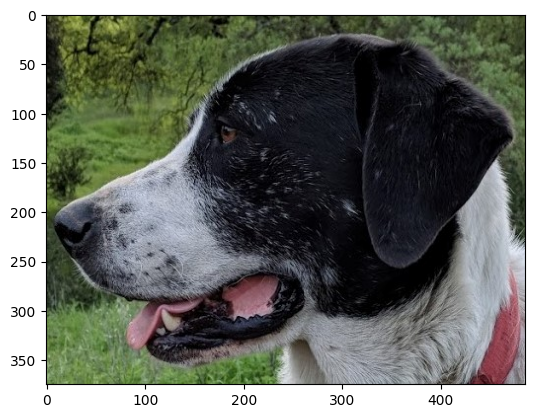

In [3]:
face = cv2.imread('../computer_vision/DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [4]:
mystring = 'sum'

In [5]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [6]:
myfunc = eval(mystring)

In [7]:
myfunc([1,2,3])

6

In [8]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


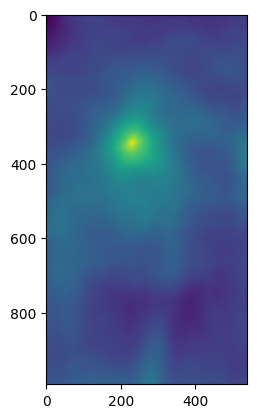

In [11]:
res = cv2.matchTemplate(full.copy(), face, cv2.TM_CCOEFF)
plt.imshow(res)

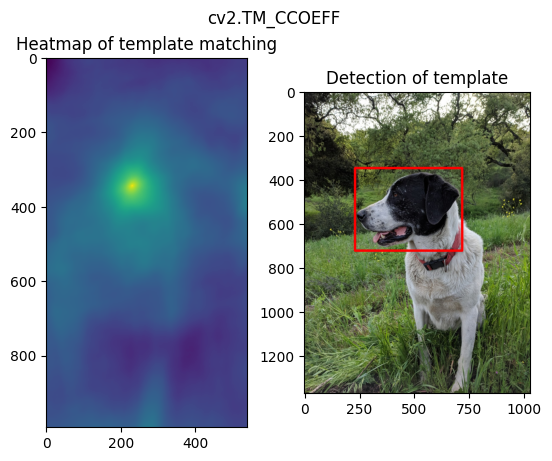

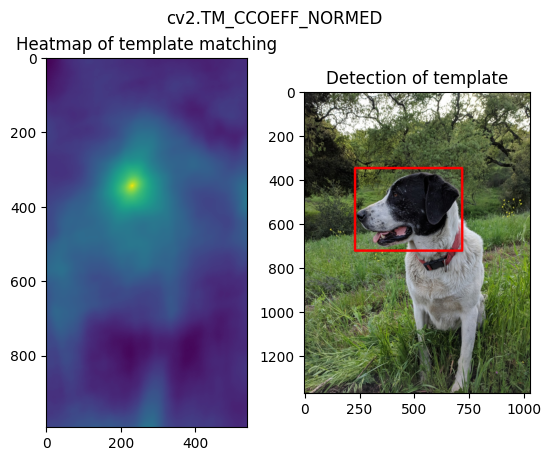

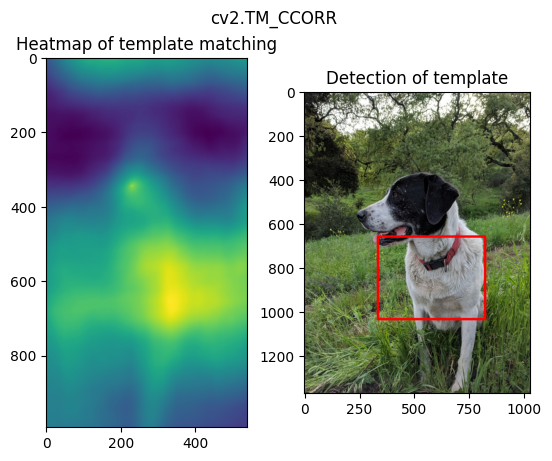

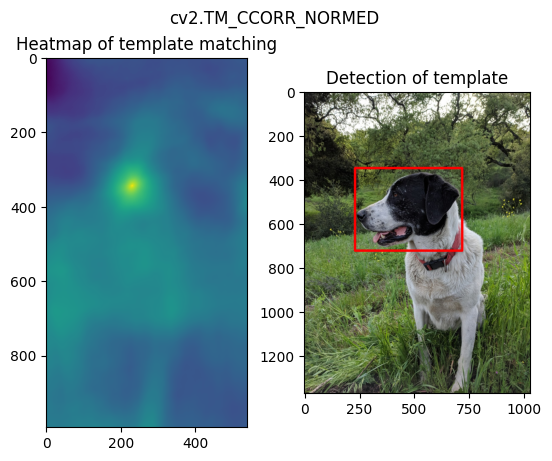

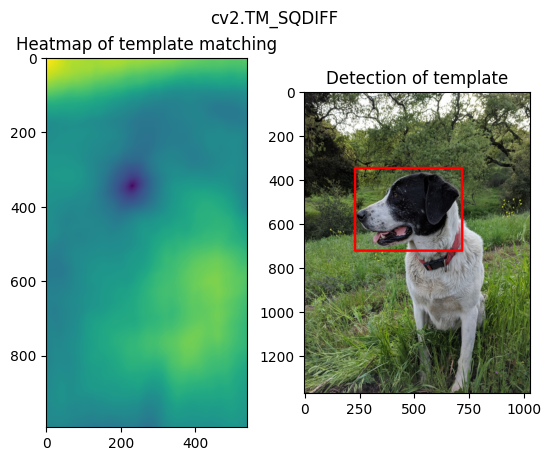

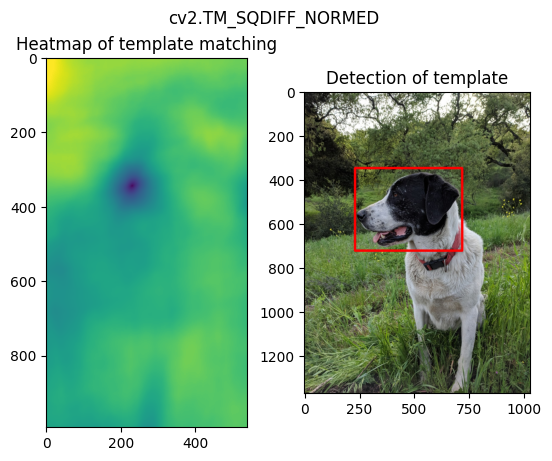

In [12]:
for m in methods:
    # copy the image
    full_copy = full.copy()
    method = eval(m)
    # template matching
    res = cv2.matchTemplate(full_copy, face, method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height,width,channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    plt.suptitle(m)
    plt.show()
    print('\n')
    print('\n')
